***Basic testing of VGG16 Model***

In [5]:
from keras.applications.vgg16 import VGG16
# Loading model
model = VGG16()

553467096/553467096 [==============================] - 3s 0us/step


In [6]:
model.summary () # gives modal summary, layers
#output shape = image size, filters

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

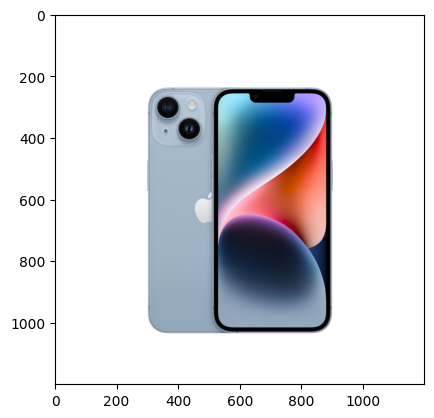

In [ ]:
# displaying image
from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

# load an image from file
image = load_img('/content/phone.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = np.array(image)

# reshave data for the model
image = image.reshape((1, image.shape [0], image.shape [1], image.shape [2]))

# prepare the image for the VGG model
image = preprocess_input (image)
image

my_image = mpimg.imread('/content/phone.jpg')
plt.imshow(my_image)
plt.show()

In [ ]:
yhat = model.predict (image)

1/1 [==============================] - 1s 1s/step


In [ ]:
# convert the probabilities to class labels and showing highest probabilities of the image above
from keras.applications.vgg16 import preprocess_input, decode_predictions
label = decode_predictions (yhat)
label

[[('n03666591', 'lighter', 0.18178442),
  ('n04074963', 'remote_control', 0.1669244),
  ('n03492542', 'hard_disc', 0.10256354),
  ('n03584254', 'iPod', 0.07499981),
  ('n06874185', 'traffic_light', 0.06856682)]]

***NOW TRAINING & BUILDING A NEW MODEL***

In [7]:
from __future__ import print_function
import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing import image
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from tensorflow.keras.utils import get_source_inputs, get_file

In [8]:
#Desigining the model with 16 layers

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def VGGupdated(input_tensor=None, classes=2):
    img_rows, img_cols = 300, 300  # by default size is 224, 224
    img_channels = 3 #coloured images
    img_dim = (img_rows, img_cols, img_channels)
    img_input = Input(shape=img_dim) #user input

    #convolutional layers
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input) #relu converts -ve numbers to 0
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x) # padding make output image size = input size
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x) #reduce image size and chooses highest value from 2x2 pooling window

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x) # 128 filtered images
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Classification block
    #fully connnected layers
    x = Flatten(name='flatten')(x) #flattens to 1D image
    x = Dense(4096, activation='relu', name='fc1')(x) #4096 neurons tat accept flattned image from convolution layer
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x) # softmax calculates highest probability for class

    # create model
    model = Model(inputs=img_input, outputs=x, name='VGGdemo')
    return model

# Call the function to create the model
model = VGGupdated(classes=2)  # bedroom and dining room


In [9]:
#model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Bigdatasets/House_Room_Dataset')
room_types = os.listdir('/content/drive/MyDrive/Bigdatasets/House_Room_Dataset')
print("Room types:", room_types)  # Print the types of rooms in this dataset
print("Types of rooms found:", len(dataset_path))  # Print the number of items in the dataset_path list

Room types: ['Bedroom', 'Dinning']
Types of rooms found: 2


In [11]:
#conatins all images & folders with path
rooms = []

for item in room_types:
    # Get all file names
    all_rooms = os.listdir('/content/drive/MyDrive/Bigdatasets/House_Room_Dataset' + '/' + item)

    # Add them to the list
    for room in all_rooms:
        rooms.append((item, str('/content/drive/MyDrive/Bigdatasets/House_Room_Dataset' + '/' + item) + '/' + room))

print(rooms)



[('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1431.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1423.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1426.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1430.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1422.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1427.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1432.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1425.jpg'), ('Bedroom', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Bedroom/bed_1428.jpg'), ('Dinning', '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Dinning/din_1579.jpg'), (

In [12]:
# Build a dataframe and seperate room type name and path columns
rooms_df = pd.DataFrame (data=rooms, columns=['room type', 'image'])
print(rooms_df.head()) # first 5

#print(rooms df.tail()) # last 5

  room type                                              image
0   Bedroom  /content/drive/MyDrive/Bigdatasets/House_Room_...
1   Bedroom  /content/drive/MyDrive/Bigdatasets/House_Room_...
2   Bedroom  /content/drive/MyDrive/Bigdatasets/House_Room_...
3   Bedroom  /content/drive/MyDrive/Bigdatasets/House_Room_...
4   Bedroom  /content/drive/MyDrive/Bigdatasets/House_Room_...


In [13]:
# checking how many samples for each category are present
print("Total number of rooms in the dataset:", len (rooms_df))

room_count = rooms_df ['room type' ].value_counts()

print("rooms in each category: ")
print (room_count)

Total number of rooms in the dataset: 21
rooms in each category: 
Dinning    11
Bedroom    10
Name: room type, dtype: int64


In [14]:
#resizing images
import cv2
import os

path = '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset'
im_size = 300

images = []
labels = []
#entering each folder
for i in room_types:
    data_path = path + '/' + str(i)
    filenames = [i for i in os.listdir(data_path)]
# resizing function for each image in the folder
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)


In [15]:
# converting images to array
images = np.array (images)

images = images.astype('float32') / 255.0 #pixel density
images.shape

(21, 300, 300, 3)

**Label encoding** is a process of transforming categorical data into numerical labels, typically for the purpose of feeding it into machine learning models. It is often used when the categorical data has some kind of ordinal relationship

In [16]:
from sklearn.preprocessing import LabelEncoder

# Assuming rooms_df is your DataFrame containing the 'room type' column
y = rooms_df['room type'].values

# Initialize the LabelEncoder
y_labelencoder = LabelEncoder()

# Fit and transform the 'room type' column
y = y_labelencoder.fit_transform(y)

print(y)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


**One-hot encoding** is a process used to convert categorical data, which may have integer or string values, into a format that can be provided to machine learning algorithms to improve their predictive performance.

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Assuming y is a 1D array that you want to one-hot encode
y = y.reshape(-1, 1)
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y).toarray()
print(Y.shape)  # Print the shape of Y


(21, 2)


**Training & Testing**

In [18]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Assuming images and Y are already defined
images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

# Inspect the shape of the training and testing data
print("train_x shape:", train_x.shape)
print("train_y shape:", train_y.shape)
print("test_x shape:", test_x.shape)
print("test_y shape:", test_y.shape)


train_x shape: (19, 300, 300, 3)
train_y shape: (19, 2)
test_x shape: (2, 300, 300, 3)
test_y shape: (2, 2)


In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 32) # epoch is how many times we are runnung the model for better accuracy

Epoch 1/10
1/1 [==============================] - 81s 81s/step - loss: 0.6932 - accuracy: 0.4737
Epoch 2/10
1/1 [==============================] - 74s 74s/step - loss: 3.5552 - accuracy: 0.5263
Epoch 3/10
1/1 [==============================] - 83s 83s/step - loss: 0.7015 - accuracy: 0.4737
Epoch 4/10
1/1 [==============================] - 72s 72s/step - loss: 0.6957 - accuracy: 0.4737
Epoch 5/10
1/1 [==============================] - 71s 71s/step - loss: 0.6924 - accuracy: 0.5263
Epoch 6/10
1/1 [==============================] - 71s 71s/step - loss: 0.6938 - accuracy: 0.5263
Epoch 7/10
1/1 [==============================] - 74s 74s/step - loss: 0.6921 - accuracy: 0.5263
Epoch 8/10
1/1 [==============================] - 72s 72s/step - loss: 0.6925 - accuracy: 0.5263
Epoch 9/10
1/1 [==============================] - 71s 71s/step - loss: 0.6923 - accuracy: 0.5263
Epoch 10/10
1/1 [==============================] - 70s 70s/step - loss: 0.6921 - accuracy: 0.5263


0.52 indicates not so good accuracy

In [ ]:
preds = model.evaluate(test_x, test_y)
print("Loss = " + str(preds[0]))  # Note that it is preds[0], not preds[01]
print("Test Accuracy = " + str(preds[1]))  # Use square brackets to access the elements, not parentheses


1/1 [==============================] - 6s 6s/step - loss: 0.7333 - accuracy: 0.0000e+00
Loss = 0.7333052158355713
Test Accuracy = 0.0


**Taking user input and classify**

Input image shape: (1, 300, 300, 3)


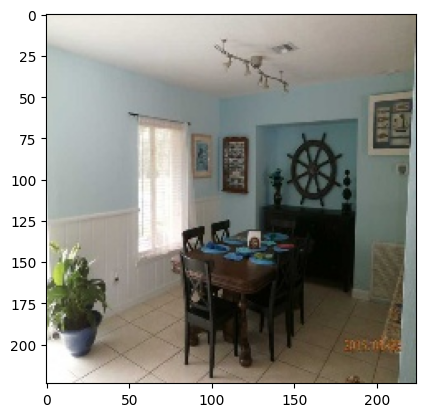

In [ ]:
from matplotlib.pyplot import imread, imshow
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

img_path = '/content/drive/MyDrive/Bigdatasets/House_Room_Dataset/Dinning/din_1584.jpg'
img = image.load_img(img_path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
class_labels = ['bedroom', 'dining room']  # Specify the class labels in the order corresponding to the model output
predictions = model.predict(x)  # Assuming 'x' is the input data
predicted_class = class_labels[np.argmax(predictions)]

print("Predicted class:", predicted_class)

1/1 [==============================] - 2s 2s/step
Predicted class: dining room


In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Assuming images and Y are already defined
images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

# Assuming 'model' is your trained model
y_pred = model.predict(test_x)  # This will give you the predicted labels
y_pred = np.argmax(y_pred, axis=1)  # If the model outputs probabilities, convert them to class labels

# Assuming 'test_y' contains the true labels for the test set
y_true = test_y  # Use the actual labels as y_true


1/1 [==============================] - 2s 2s/step


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import numpy as np

# Assuming you have the true labels in 'y_true' and the predicted labels in 'y_pred'
y_true = [0, 1, 1, 0, 1]  # Replace with your actual true labels
y_pred = [0, 1, 1, 0, 0]  # Replace with your model's predicted labels

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Calculating true positive, true negative, false positive, and false negative
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Precision
precision = tp / (tp + fp)
print("Precision:", precision)

# Recall
recall = tp / (tp + fn)
print("Recall:", recall)

# F1-score
f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1)

# Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# False Positive Rate (FPR)
fpr = fp / (fp + tn)
print("False Positive Rate:", fpr)

# False Negative Rate (FNR)
fnr = fn / (fn + tp)
print("False Negative Rate:", fnr)

# ROC AUC
roc_auc = roc_auc_score(y_true, y_pred)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Confusion Matrix:
[[2 0]
 [1 2]]
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
Specificity: 1.0
False Positive Rate: 0.0
False Negative Rate: 0.3333333333333333
ROC AUC Score: 0.8333333333333333
